In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("troop_movements.csv")

In [5]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-11 10:02:55,1,resistance_soldier,resistance,9,7,8,3,Sullust
1,2024-07-11 10:02:54,2,at-at,empire,3,7,1,8,Tatooine
2,2024-07-11 10:02:53,3,tie_silencer,empire,1,2,3,3,Cerea
3,2024-07-11 10:02:52,4,at-at,empire,4,9,7,3,Tund
4,2024-07-11 10:02:51,5,stormtrooper,empire,9,9,6,5,Kashyyyk


In [ ]:
for columnname in df.columns:
    print(df[columnname].value_counts())

In [6]:
df["is_resistance"] = df["empire_or_resistance"] == "resistance"

In [7]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 10:02:55,1,resistance_soldier,resistance,9,7,8,3,Sullust,True
1,2024-07-11 10:02:54,2,at-at,empire,3,7,1,8,Tatooine,False
2,2024-07-11 10:02:53,3,tie_silencer,empire,1,2,3,3,Cerea,False
3,2024-07-11 10:02:52,4,at-at,empire,4,9,7,3,Tund,False
4,2024-07-11 10:02:51,5,stormtrooper,empire,9,9,6,5,Kashyyyk,False


Text(0.5, 12.44444444444443, '')

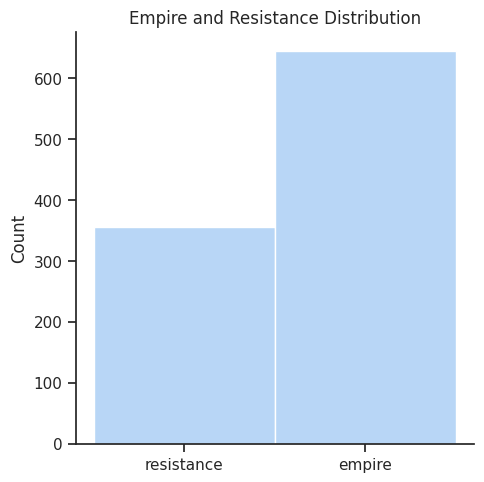

In [8]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="pastel", rc=custom_params)
sns.displot(x="empire_or_resistance", data=df )
plt.pyplot.title("Empire and Resistance Distribution")
plt.pyplot.xlabel("")

In [ ]:
df.dtypes

In [9]:
df2 =pd.get_dummies(df,columns = ["homeworld","unit_type"])

In [ ]:
df2.columns

In [10]:
feature_cols = ['homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
       'homeworld_Trandosha', 'homeworld_Troiken', 'homeworld_Tund',
       'homeworld_Umbara', 'homeworld_Vulpter', 'homeworld_Zolan',
       'unit_type_at-at', 'unit_type_at-st', 'unit_type_resistance_soldier',
       'unit_type_stormtrooper', 'unit_type_tie_fighter',
       'unit_type_tie_silencer', 'unit_type_unknown', 'unit_type_x-wing']
X = df2[feature_cols]
y = df2.is_resistance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [11]:
X_train.dtypes

homeworld_Alderaan              bool
homeworld_Aleen Minor           bool
homeworld_Bestine IV            bool
homeworld_Cerea                 bool
homeworld_Champala              bool
homeworld_Chandrila             bool
homeworld_Concord Dawn          bool
homeworld_Corellia              bool
homeworld_Dagobah               bool
homeworld_Dathomir              bool
homeworld_Dorin                 bool
homeworld_Eriadu                bool
homeworld_Glee Anselm           bool
homeworld_Haruun Kal            bool
homeworld_Iktotch               bool
homeworld_Iridonia              bool
homeworld_Kalee                 bool
homeworld_Kashyyyk              bool
homeworld_Malastare             bool
homeworld_Mirial                bool
homeworld_Mon Cala              bool
homeworld_Muunilinst            bool
homeworld_Naboo                 bool
homeworld_Ojom                  bool
homeworld_Quermia               bool
homeworld_Rodia                 bool
homeworld_Ryloth                bool
h

In [12]:
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

cross_val_score(clf, X_test, y_test, cv=10)

array([0.86666667, 0.66666667, 1.        , 0.8       , 0.86666667,
       0.73333333, 0.4       , 0.8       , 0.53333333, 0.93333333])

importances = clf.feature_importances_

In [13]:
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

Text(0.5, 0, 'Features')

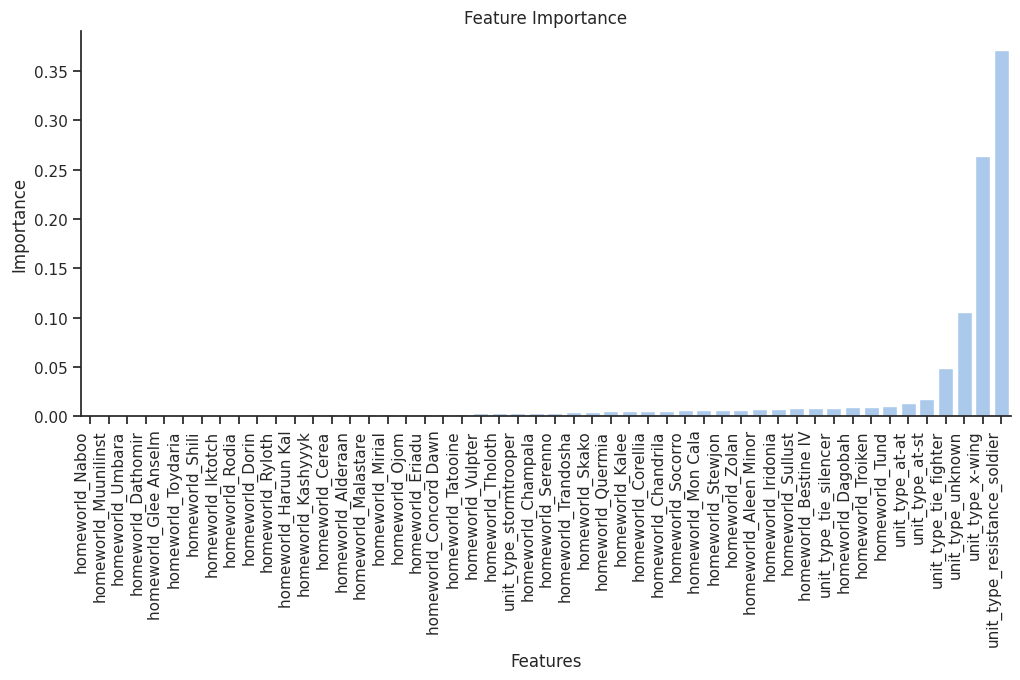

In [14]:
feature_importance.sort_values(by=['Importance'])
# fet_order = feature_importance['Feature'].value_counts().index
fig, ax = plt.pyplot.subplots(figsize=(12, 5))
sns.barplot(x="Feature", y="Importance", data=feature_importance, order=feature_importance.sort_values('Importance').Feature )
plt.pyplot.xticks(rotation=90, ha='right')
plt.pyplot.title("Feature Importance")
plt.pyplot.xlabel("Features")

In [15]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(clf, file)

In [17]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.0 MB/s eta 0:00:00


In [20]:
df10m = pd.read_csv("troop_movements10m.csv")

In [21]:
df10m.head(30)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1.0,1.0,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0.0,1.0,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6.0,1.0,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6.0,9.0,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9.0,6.0,Muunilinst
5,2023-06-13 17:33:13,6,at-st,0.0,7.0,9.0,7.0,Trandosha
6,2023-06-13 17:33:13,7,at-at,2.0,1.0,8.0,1.0,Kashyyyk
7,2023-06-13 17:33:12,8,tie_fighter,7.0,7.0,7.0,7.0,Tholoth
8,2023-06-13 17:33:11,9,at-at,0.0,7.0,9.0,5.0,Champala
9,2023-06-13 17:33:10,10,stormtrooper,8.0,6.0,9.0,7.0,Ojom


In [34]:
df10m = df10m.replace('invalid_unit','unknown')
df10m = df10m.replace('unit_type_unknown','unknown')

In [35]:
df10m = df10m.ffill()

In [36]:
df210m =pd.get_dummies(df10m,columns = ["homeworld","unit_type"])

In [37]:
predictions = clf.predict(df210m[feature_cols])

In [38]:
df_predictions = df10m
df_predictions["Prediction"] = predictions

In [40]:
df_predictions.head(50)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,Prediction
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1.0,1.0,Glee Anselm,False
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0.0,1.0,Trandosha,False
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6.0,1.0,Corellia,False
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6.0,9.0,Shili,False
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9.0,6.0,Muunilinst,True
5,2023-06-13 17:33:13,6,at-st,0.0,7.0,9.0,7.0,Trandosha,False
6,2023-06-13 17:33:13,7,at-at,2.0,1.0,8.0,1.0,Kashyyyk,False
7,2023-06-13 17:33:12,8,tie_fighter,7.0,7.0,7.0,7.0,Tholoth,False
8,2023-06-13 17:33:11,9,at-at,0.0,7.0,9.0,5.0,Champala,False
9,2023-06-13 17:33:10,10,stormtrooper,8.0,6.0,9.0,7.0,Ojom,False
